# AIMS Hackathon Winner 2019
### What was the last work experience of Trump appointees?
We want to know these people's backgrounds, identifying their most recent experience if it is representative of the hundreds of millions of U.S. citizens they make changes for. Specifically, we identify where their last job was, and whether it was for a Fortune 500 company.

In [230]:
import pandas as pd
import numpy as np
import us

## Find revelevant data
Figure out what the last job was of each individual, and only keep that job and other relevant information in the dataset.

In [231]:
people = pd.read_csv("people_orgs.csv")
interest_data = {"id": people["id"], "name": people["name"], "agency_slug": people["agency_slug"], "agency_name": people["name.1"], "agency_city": people["city"], "agency_state": people["state"], "slug_1": people["slug.1"]}
df = pd.DataFrame(interest_data)
uniq = df["id"].unique()

In [232]:
unique_df = pd.DataFrame(columns=df.columns)

count = 0
for index, row in df.iterrows():
    row_ex = {}
    for col in df.columns:
        row_ex[col] = row[col]
    if row_ex["name"] not in list(unique_df["name"]):
        unique_df.loc[count] = row_ex
        count += 1

## State counts
Get a count of each valid state from the data

In [235]:
unique_states = list(unique_df["agency_state"])

states_abvrs = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states_full = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming", "District of Columbia"]

state_count = {}
for i in unique_states:
    if (i in states_abvrs) or (i in states_full):
        if i in state_count:
            state_count[i] += 1
        else:
            state_count[i] = 1

state_count["District of Columbia"] += state_count["DC"]
state_count.pop("DC")

83

## Change state abbreviations
Find the states with full names and keep them that way. If an abbreviation is found and it is a new state, add it to the full name state list.

In [236]:
fullnames = []
good_states = []

for i in state_count:
    if len(i) > 2:
        good_states.append(i)
    elif len(i) == 2:
        fullname = eval("us.states." + i + ".name")
        if fullname not in common:
            fullnames.append(fullname)
            
final = fullnames + good_states

## Create the map
All mapping code and basic statistics, relient upon matplotlib.basemap

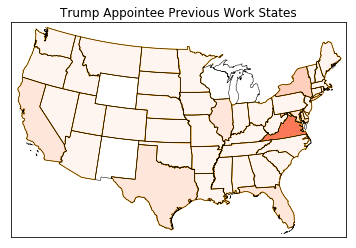

In [237]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib import cm

plt.close()
mp = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

reds = cm.get_cmap('Reds', 12)
mx = max(list(state_count.values()))

# load the shapefile, use the name 'states'
mp.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in mp.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

for state in final:
    seg = mp.states[state_names.index(state)]
    poly = Polygon(seg, facecolor=reds(state_count[state] / mx),edgecolor='orange')
    ax.add_patch(poly)

plt.title("Trump Appointee Previous Work States")
plt.savefig("appointee_map.png", dpi=200)

## Fortune 500
Read 2019's Fortune 500 companies and try to find them for each appointee

In [238]:
fortune = pd.read_csv("https://raw.githubusercontent.com/cmusam/fortune500/master/csv/fortune500-2018.csv")
comps = list(fortune["company"])
count = 0
for i in ds["agency_name"]:
    vals = i.split(" ")
    for val in vals:
        if val in comps:
            count += 1

totalAgency = len(ds["agency_name"])

# Percent that last worked for Fortune 500 company
print (count / totalAgency * 100)

1.1808576755748912


## Results
Most of the people in Trump has appointed held their last job in the Virginia area. No appointees were from Michigan, Wisconsin, Wyoming, or New Mexico. Furthermore, just 1.18% had their last job working at a Fortune 500 company.

First place at the AIMS Hackathon, woohoo!